本程序是想让Tensorflow实现一下学习XOR数据集

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

XOR数据集，前2列为坐标点，最后一列为value

In [2]:
graph1 = tf.Graph()
with graph1.as_default():
    input_X = tf.placeholder(dtype=tf.float32, shape=[None, 2], name='Input-X')
    input_Y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='Input-Label')

    print('Input layer : ', input_X)
    print('Input label : ', input_Y)

    W1 = tf.get_variable(name='W1', initializer=tf.truncated_normal(shape=(2, 2), mean=0.0, stddev=0.1))
    b1 = tf.get_variable(name='b1', initializer=tf.truncated_normal(shape=(2,), mean=0.0, stddev=0.1))

    W2 = tf.get_variable(name='W2', initializer=tf.truncated_normal(shape=(2, 1), mean=0.0, stddev=0.1))
    b2 = tf.get_variable(name='b2', initializer=tf.truncated_normal(shape=(1,), mean=0.0, stddev=0.1))

    predict = tf.matmul(input_X, W1) + b1
    print('Layer 1 output : ', predict)
    predict = tf.nn.relu(predict)
    predict = tf.matmul(predict, W2) + b2
    print('Layer 2 output : ', predict)

    loss0 = tf.square(predict - input_Y)
    print('Loss0 : ', loss0)

    loss = tf.reduce_mean(loss0)
    print('Final Loss : ', loss)

    optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9)
    train_op = optimizer.minimize(loss)

Input layer :  Tensor("Input-X:0", shape=(?, 2), dtype=float32)
Input label :  Tensor("Input-Label:0", shape=(?, 1), dtype=float32)
Layer 1 output :  Tensor("add:0", shape=(?, 2), dtype=float32)
Layer 2 output :  Tensor("add_1:0", shape=(?, 1), dtype=float32)
Loss0 :  Tensor("Square:0", shape=(?, 1), dtype=float32)
Final Loss :  Tensor("Mean:0", shape=(), dtype=float32)


In [3]:
def train(graph):
    X = np.array([
        [0, 0],
        [1, 0],
        [0, 1],
        [1, 1]
    ])
    Y = np.array([0, 1, 1, 0]).reshape((4, 1))
    loss_all = []
    with graph.as_default():
        init = tf.global_variables_initializer()
        with tf.Session() as sess:
            sess.run(init)
            for n in range(MAX_STEPS):
                feed_dict = {input_X: X, input_Y: Y}
                _, loss_step = sess.run([train_op, loss], feed_dict=feed_dict)
                loss_all.append(loss_step)
#                 print('STEP : ', n, loss_step)

            print('W1', sess.run(W1))
            print('b1', sess.run(b1))
            print('W2', sess.run(W2))
            print('b2', sess.run(b2))
            print('Predict', sess.run(predict, feed_dict={input_X: X}))
    return loss_all

graph1表示的计算图1并不总能够收敛。下面是收敛的情况。

W1 [[-0.8440108   0.8457995 ]
 [ 0.84403497 -0.8458179 ]]
b1 [-2.4149156e-05 -4.4085755e-05]
W2 [[1.1848189]
 [1.182375 ]]
b2 [-1.3642075e-11]
Predict [[-1.3642075e-11]
 [ 1.0000000e+00]
 [ 9.9999994e-01]
 [ 5.9617840e-08]]
Final loss :  1.7767494e-15


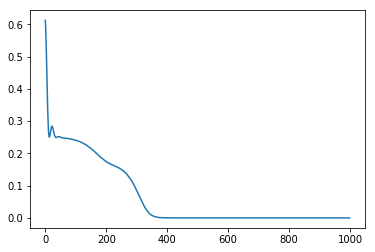

In [4]:
MAX_STEPS = 1000
loss_all = train(graph1)
print("Final loss : ", loss_all[-1])
plt.plot(loss_all)

下面是不收敛的情况。

W1 [[-0.12967941  0.07772257]
 [-0.03664541 -0.03819619]]
b1 [-0.04820965 -0.12394394]
W2 [[-0.16450928]
 [-0.06491105]]
b2 [0.5]
Predict [[0.5]
 [0.5]
 [0.5]
 [0.5]]
Final loss :  0.25


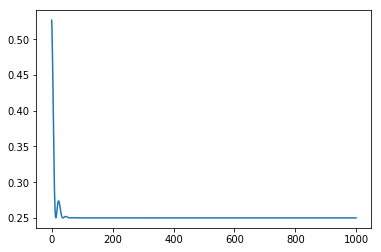

In [5]:
MAX_STEPS = 1000
loss_all = train(graph1)
print("Final loss : ", loss_all[-1])
plt.plot(loss_all)

再试一次

W1 [[-0.8448966   0.8501119 ]
 [ 0.84487706 -0.84946465]]
b1 [-7.206519e-05 -7.568001e-04]
W2 [[1.1837051]
 [1.1773639]]
b2 [2.8655924e-14]
Predict [[2.8655924e-14]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.8655924e-14]]
Final loss :  4.1375933e-28


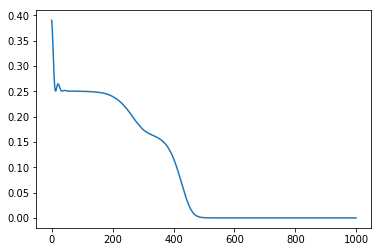

In [6]:
MAX_STEPS = 1000
loss_all = train(graph1)
print("Final loss : ", loss_all[-1])
plt.plot(loss_all)